# Titanic Challenge


## Purpose
State the purpose of the notebook.

## Methodology
Quickly describe assumptions and processing steps.

## WIP - improvements
Use this section only if the notebook is not final.

Notable TODOs:
- todo 1;
- todo 2;
- todo 3.

## Results
Describe and comment the most important results.

## Suggested next steps
State suggested next steps, based on results obtained in this notebook.

# Setup

## Library import
We import all the required Python libraries

In [2]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

import pandas as pd
#pd.options.display.max_columns = 100

from matplotlib import pyplot as plt
import numpy as np

import seaborn as sns

import pylab as plot
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plot.rcParams.update(params)

## Local library import
We import all the required local libraries libraries

In [ ]:
# Include local library paths
import sys
# sys.path.append('path/to/local/lib') # uncomment and fill to import local libraries

# Import local libraries

# Parameter definition
We set all relevant parameters for our notebook. By convention, parameters are uppercase, while all the 
other variables follow Python's guidelines.


# Data import
We retrieve all the required data for the analysis.

In [3]:
df = pd.read_csv('../Dataset/train.csv')

# Data Exploration
Put here the core of the notebook. Feel free di further split this section into subsections.

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

Let's run describe() to get general sense of the data

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


It can be observed that the count is less for Age column. Means some data is missing. Let's append the missing data using median.

In [7]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


So we replaced the null values using median.

Let's visualize gender based survival

In [9]:
df['Died'] = 1 - df['Survived']

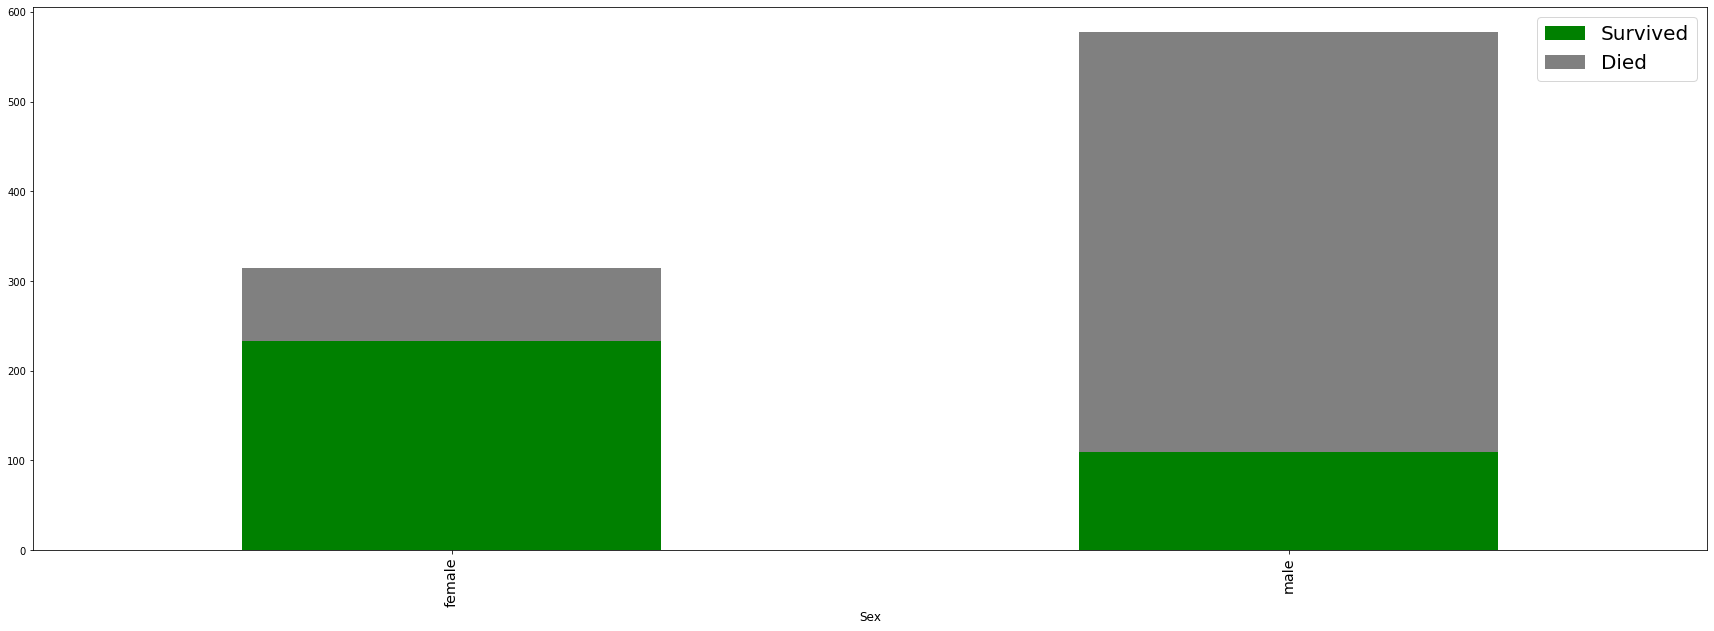

In [15]:
df.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(30,10), stacked=True, colors=['g', 'grey']);

So, it looks like female survival is high.

Let's plot the same graph using ratio

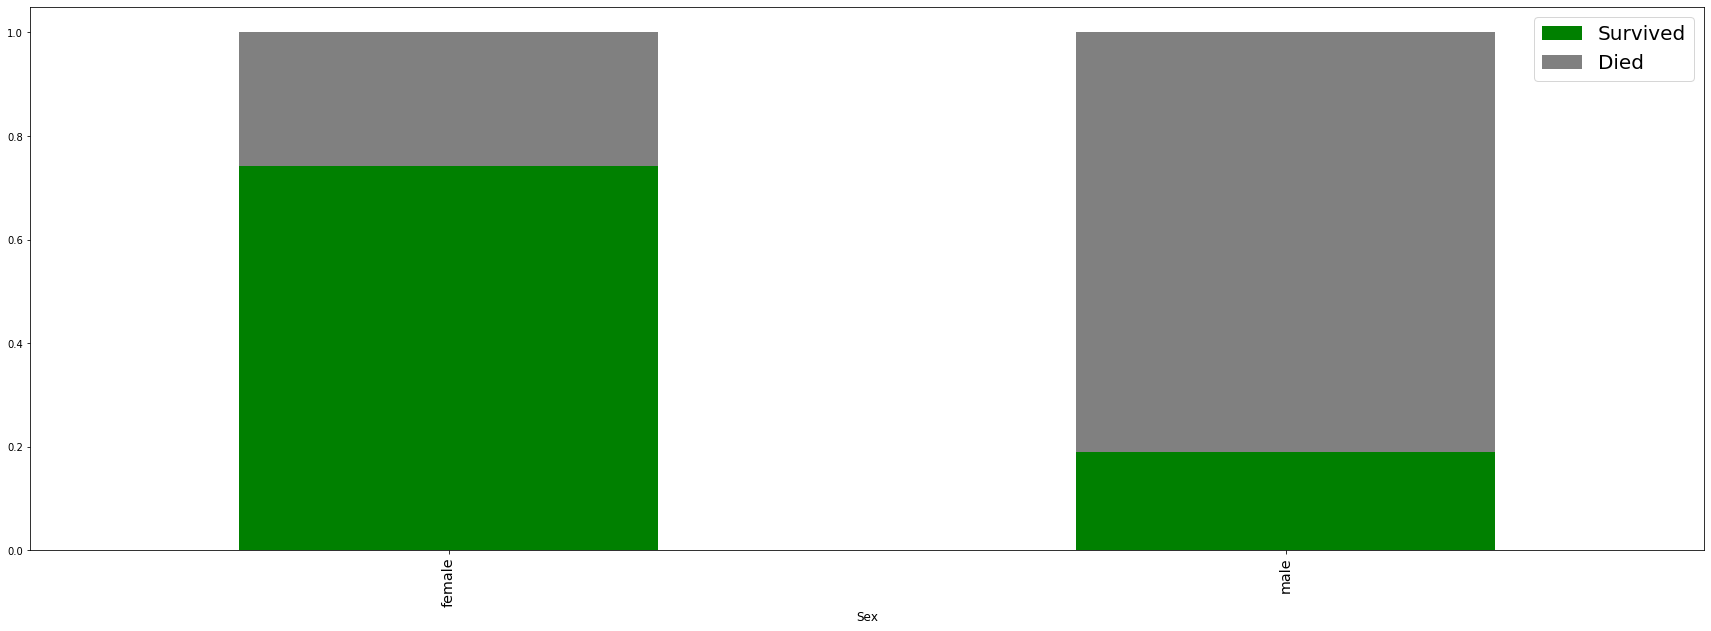

In [16]:
df.groupby('Sex').agg('mean')[['Survived', 'Died']].plot(kind='bar', figsize=(30,10), stacked=True, colors=['g', 'grey']);

Let's make a correlation between survival and age 

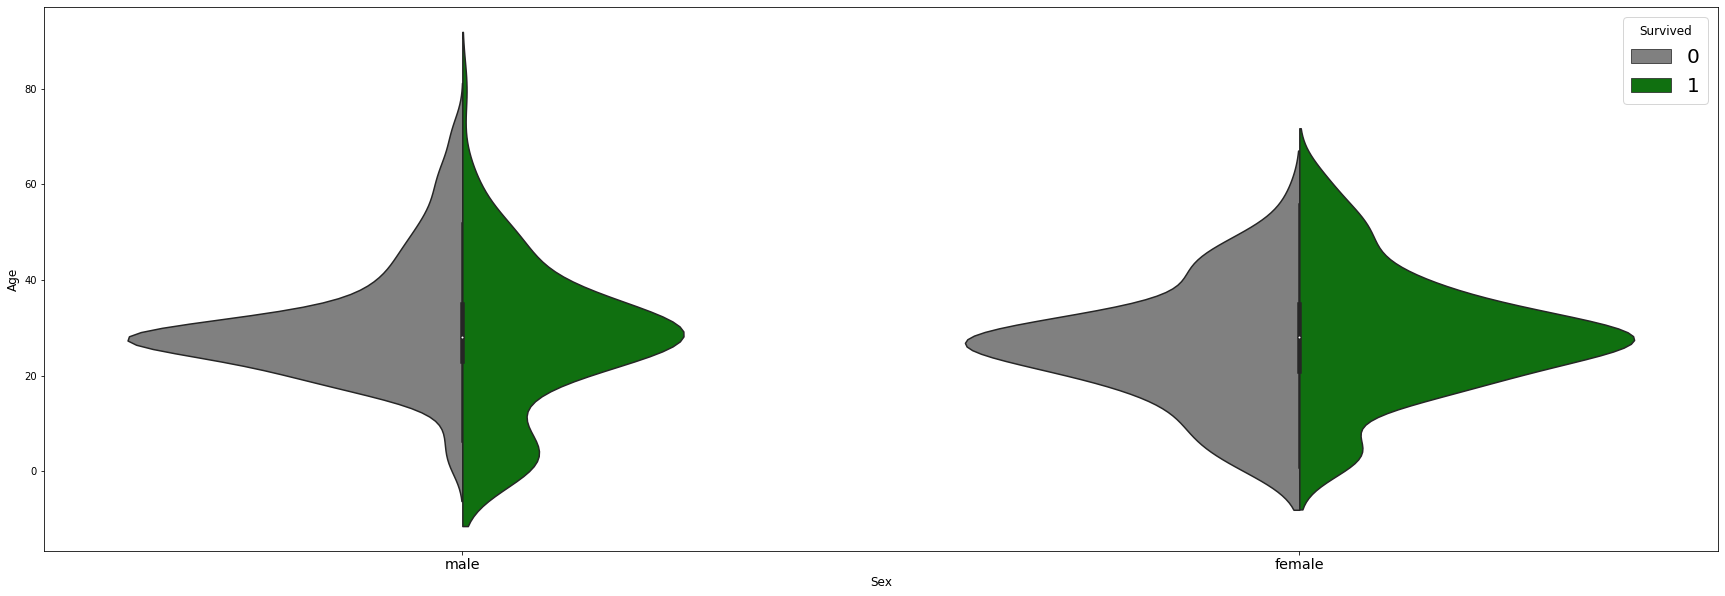

In [17]:
fig = plt.figure(figsize=(30,10))

sns.violinplot(x='Sex', y='Age', hue='Survived', data=df, split=True, palette={0: 'grey', 1: 'green'});


This confirms more women survival (larger green histogram in case of female)

Now, for male:
- Younger tend to survive
- Age between 20 to 40 died in large number

For female no clear relation is observed between age and survival

Let's try to correlate the fare ticket and survival 

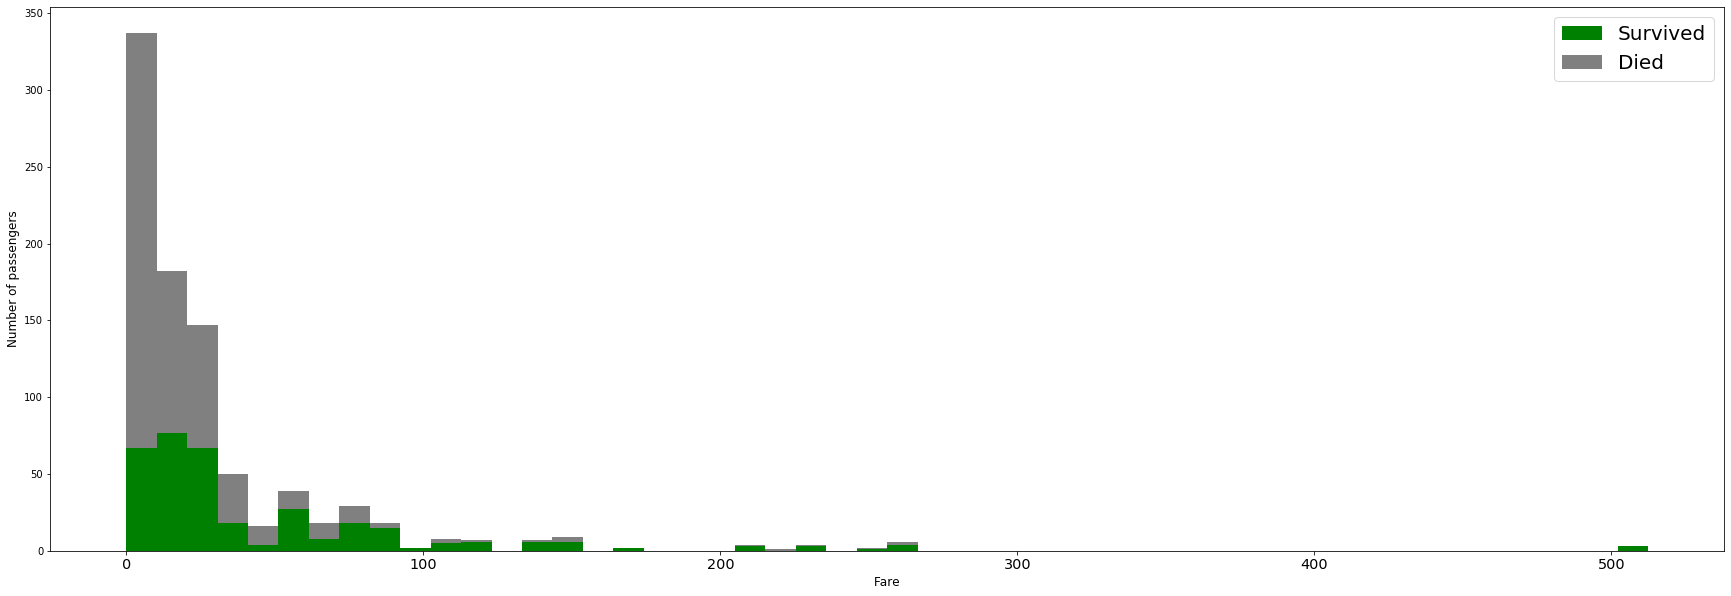

In [19]:
fig = plt.figure(figsize=(30,10))

plt.hist([df[df['Survived']==1]['Fare'], df[df['Survived']==0]['Fare']],
         stacked=True, color=['green','grey'], bins=50, label=['Survived','Died'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend();

Passengers with cheap tickets are more likely to die than with expensive tickets. 

Let's combine fare, age, and survival together

Text(0, 0.5, 'Fare')

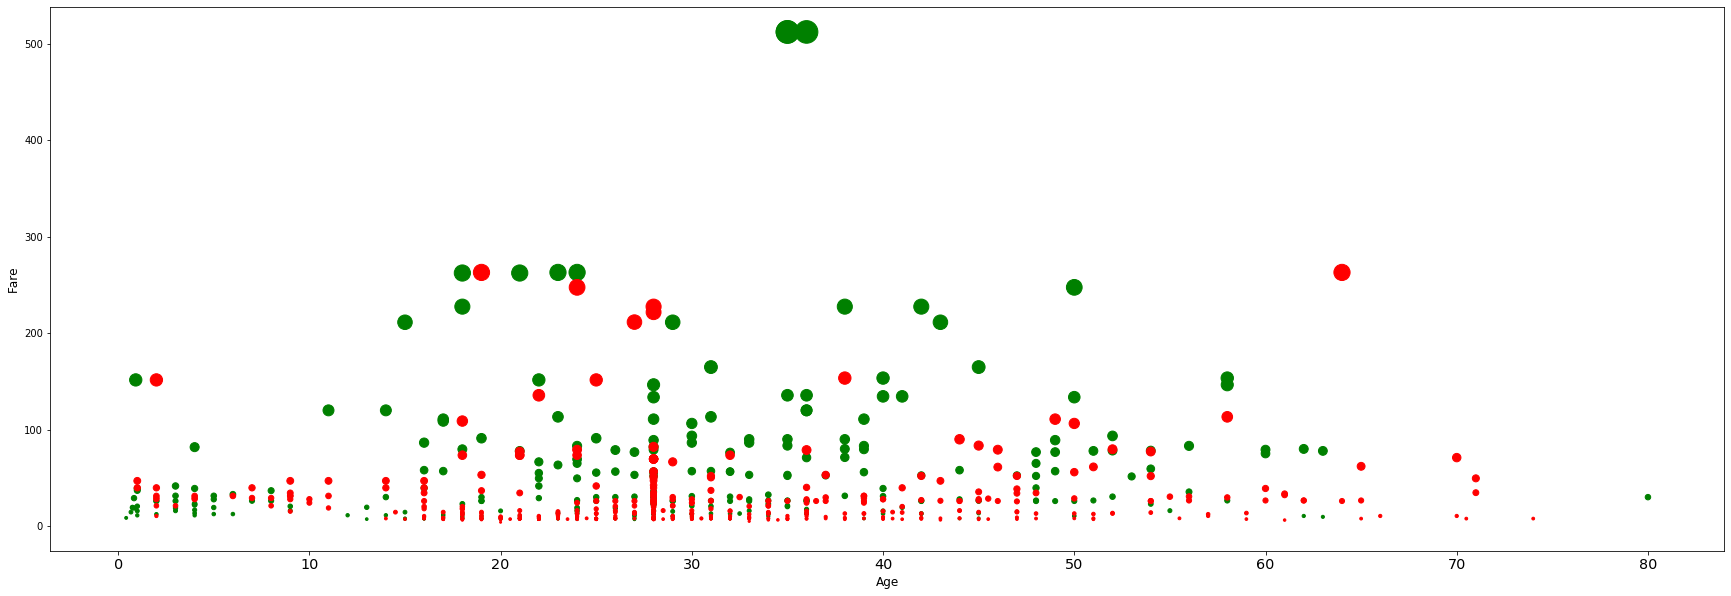

In [23]:
fig = plt.figure(figsize=(30,10))

plt.scatter(df[df['Survived']==1]['Age'], 
            df[df['Survived']==1]['Fare'], c='green', s=df[df['Survived']==1]['Fare'])

plt.scatter(df[df['Survived']==0]['Age'], 
            df[df['Survived']==0]['Fare'], c='red', s=df[df['Survived']==0]['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')

Mostly, dotes with small size(low fares) are died (red). On the other hand, dotes with large radius survived (high fares, green). 

There are some green dotes below 10 years age which indicates children survival.

Also, we can see that fare directly correlates with Pclass. 

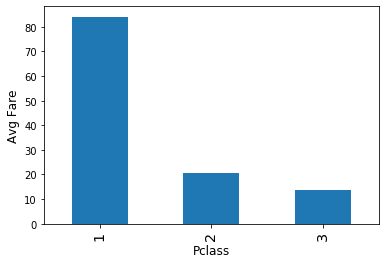

In [25]:
ax = plt.subplot()
ax.set_ylabel('Avg Fare')
df.groupby('Pclass').mean()['Fare'].plot(kind='bar', ax=ax);

Let's see how the embarkation site affects the survival

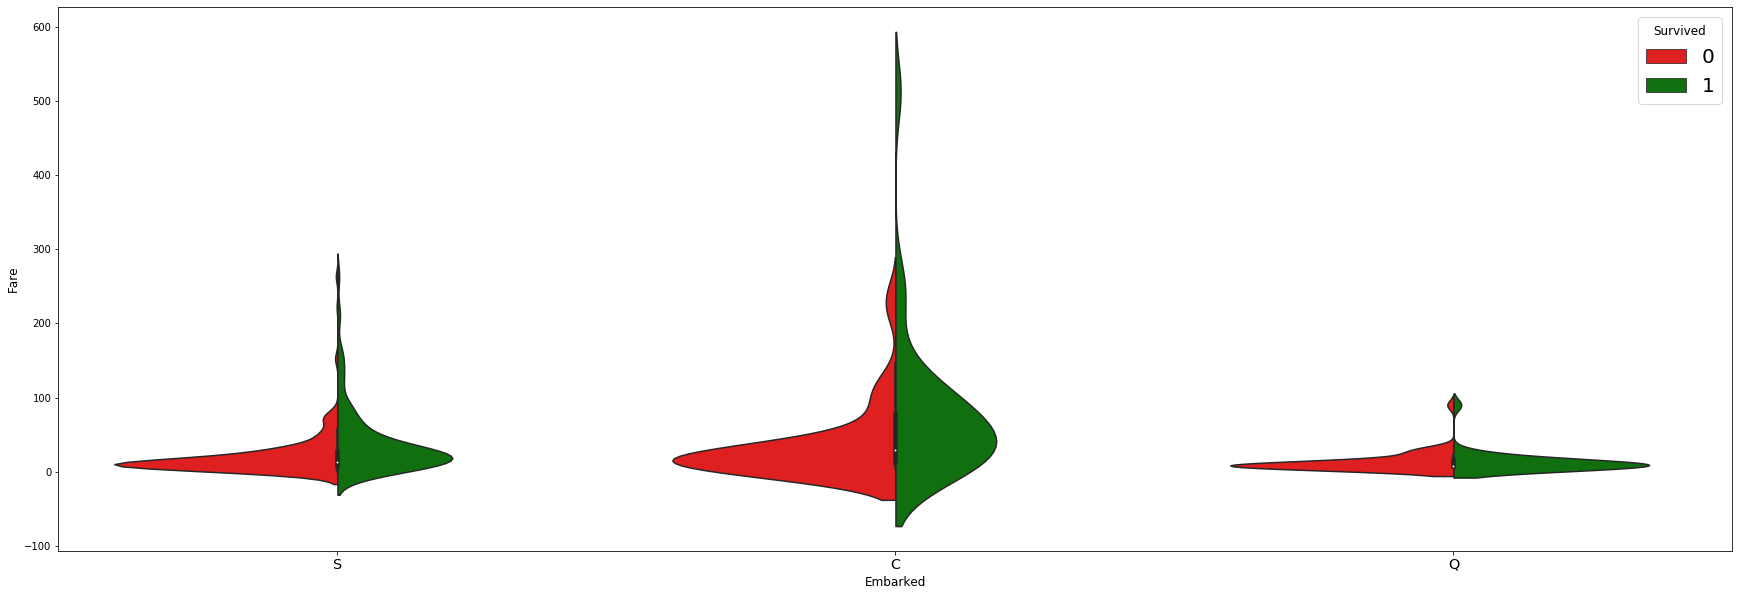

In [27]:
fig = plt.figure(figsize=(30,10))
sns.violinplot(x='Embarked',y='Fare',hue='Survived', data=df, split=True, palette={0:'r',1:'g'});

# 

# References
We report here relevant references:
1. author1, article1, journal1, year1, url1
2. author2, article2, journal2, year2, url2